# Group5


Team Members: 
Amritesh Kumar Pandey  2023da04498,
Ayur Sharma  2023da04084,
Mohit Yadav 2023da04236,
Urvashi  2023da04250


All team members contributed 100% to the assignment.



Part I

Sentence completion using N-gram:


In [2]:
import pandas as pd
import requests

# Google Drive file ID
file_id = "1e90oQiPhb5UcVdE8EjzXc0Fr1pIxEx_S"
base_url = "https://drive.google.com/uc?export=download"

# Fetch the file using requests
response = requests.get(f"{base_url}&id={file_id}", stream=True)

# Save the content to a local file
file_path = "Reviews_F1.csv"
with open(file_path, "wb") as file:
    for chunk in response.iter_content(chunk_size=1024):
        if chunk:
            file.write(chunk)

# Loading the dataset
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


   ID                                               Text
0   1  I love these cookies. I am on the paleo diet r...
1   2  I thought I'd try the multi-pack to see which ...
2   3  i just started the paleo diet and i love it! l...
3   4  I've been Paleo for six months, as has my part...
4   5  I bought a 40 sampler pack from the caveman ba...


Preprocessing -  Converting all text to lowercase to ensure case consistency. Removing Special Characters and Tokenization.

In [3]:
import re

# Basic Preprocessing 
def preprocess(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Removal of non-alphabetical characters
    return text

# Extract the text column with all non-missing text entries from the dataset.
para = df['Text'].dropna().tolist()

corpus = [preprocess(text) for text in para]
# Preprocess all texts
for i, preprocessed_text in enumerate(corpus[:5]):
    print(f"Preprocessed lines {i+1}: {preprocessed_text}")


Preprocessed lines 1: i love these cookies i am on the paleo diet right now and these cookies are what i look forward too i do like the taste of the tropical one the best they all have different taste but if you want something that is grain free and gluten free then this is the right place i expected the taste to be different and it is other reviewers seem to expect them to taste like oreos or chips ahoy of course notbr br when i eat them i dont even feel bad about it because my body welcomes them they dont make me crash either and feel like i ate junk food it is a good indicator that these were made from all natural ingredients i wish i had these cookies close to me id buy them every single day
Preprocessed lines 2: i thought id try the multipack to see which flavor i liked the best but i like them all they are healthy fulfilling and all good ingredients i can actually pronounce these are the smaller packs and now i can proceed to ordering the larger bags love these cookies
Preprocess

Generating bigrams from the tokenized words.

In [4]:
from nltk.util import ngrams
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')  # Tokenizer check

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/apande342@apac.comcast.com/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
# Function to generate bigrams
def generate_bigrams(corpus):
    bigrams = []
    for line in corpus:
        tokens = word_tokenize(line)  # Tokenize the text
        bigrams.extend(list(ngrams(tokens, 2)))  # Create bigrams
    return bigrams

# Generate bigrams from the corpus
bigrams = generate_bigrams(corpus)

# Count bigrams
bigram_counts = Counter(bigrams)

# Example output
print("Top 20 most common bigrams: ", bigram_counts.most_common(20))

Top 20 most common bigrams:  [(('of', 'the'), 376), (('in', 'the'), 304), (('i', 'have'), 298), (('it', 'is'), 274), (('this', 'is'), 255), (('is', 'a'), 191), (('and', 'i'), 189), (('i', 'was'), 187), (('if', 'you'), 181), (('they', 'are'), 180), (('and', 'the'), 177), (('this', 'product'), 160), (('in', 'a'), 159), (('on', 'the'), 157), (('the', 'best'), 156), (('for', 'a'), 152), (('is', 'the'), 149), (('to', 'the'), 147), (('it', 'was'), 141), (('so', 'i'), 138)]


Predicting the Next Word in a Sentence. Provide a partial sentence (e.g., “I like”). Rank the matching bigrams based on their frequencies in descending order. Example: If ('like', 'apples') appears 10 times and ('like', 'oranges') appears 7 times, rank apples higher. Return three most frequent second words from the matching bigrams.

In [6]:
from collections import defaultdict

# Function to predict the top 3 next words
def predict_next_words(sentence_start, bigram_counts):
    # Preprocess the input sentence
    sentence_start = preprocess(sentence_start)
    tokens = word_tokenize(sentence_start)
    
    if not tokens:
        return []
    
    last_word = tokens[-1]  # Get the last word of the sentence start
    candidates = defaultdict(int)
    
    # Find bigrams starting with the last word
    for (w1, w2), count in bigram_counts.items():
        if w1 == last_word:
            candidates[w2] += count
    
    # Sort by frequency and return top 3 predictions
    sorted_candidates = sorted(candidates.items(), key=lambda x: x[1], reverse=True)
    return [word for word, _ in sorted_candidates[:3]]


# Test the function
test_sentence = "I like"
top_3_predictions = predict_next_words(test_sentence, bigram_counts)
print("Top 3 bigram predictions:", top_3_predictions)


Top 3 bigram predictions: ['the', 'a', 'it']


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Part II

i) Text Preprocessing: 
a. Tokenization
b. Lowercasing
c. Stop Words Removal
d. Stemming
e. Lemmatization

In [7]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
import re

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/apande342@apac.comcast.com/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/apande342@apac.comcast.com/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Removal of non-alphabetical characters
    tokens = text.split()  # Tokenize
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  # Removal of stop words
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(stemmer.stem(word)) for word in tokens]  # Stemming & Lemmatization
    return ' '.join(tokens)

# Apply preprocessing
preprocessed_corpus = [preprocess_text(text) for text in para]

# print sample pre-processed 5 lines
for i, preprocessed_text in enumerate(preprocessed_corpus[:5]):
    print(f"Preprocessed line {i+1}: {preprocessed_text}")

Preprocessed line 1: love cooki paleo diet right cooki look forward like tast tropic one best differ tast want someth grain free gluten free right place expect tast differ review seem expect tast like oreo chip ahoy cours notbr br eat dont even feel bad bodi welcom dont make crash either feel like ate junk food good indic made natur ingredi wish cooki close id buy everi singl day
Preprocessed line 2: thought id tri multipack see flavor like best like healthi fulfil good ingredi actual pronounc smaller pack proceed order larger bag love cooki
Preprocessed line 3: start paleo diet love lost lb like week anyway glad find paleo cooki thank goddess theyr good love origin sent got sampl tropic love order tropic got sampl rainforest first theyr good read ingredi ull see cayenn pepper im realli sensit hot spice could sooo feel tong like tast u enjoy littl fire ur sweet ull like rainforest flavor realli wanna tri alpin flavor one theyr lot darker color interest good job caveman bakeri love
Prep

ii) Feature Extraction TF-IDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import numpy as np

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_corpus)  # Generate TF-IDF matrix

# Compute pairwise cosine similarity
similarity_matrix = cosine_similarity(tfidf_matrix)

# Remove self-similarity (diagonal elements)
np.fill_diagonal(similarity_matrix, 0)

most_similar_indices = np.unravel_index(np.argmax(similarity_matrix), similarity_matrix.shape)

# Output the top two similar documents
doc1_index, doc2_index = most_similar_indices

#Document number starts from 1 in csv file, so adding 1 to index
print(f"Top 2 similar documents are:\n document# {doc1_index+1}: {para[doc1_index]}\n document# {doc2_index+1}: {para[doc2_index]}")

Top 2 similar documents are:
 document# 208: If you like strong coffee, this is it!  The flavor is exceptional, I have not found better in a can.  This can be expensive and difficult to find at your local store.  I have had great luck with Amazon, good price for the subscription order (you can get a case a couple times a year and still get the reduced rate).  Amazon also has a wonderful return policy!<br />Try Yuban if you love strong coffee and have not found the coffee for you, this may be it!  We have been drinking it for 10+ years now & have had the Original, Organic and Dark Roast---I dont have a preference, they are all excellent.
 document# 605: If you like strong coffee, this is it!  The flavor is exceptional, I have not found better in a can.  This can be expensive and difficult to find at your local store.  I have had great luck with Amazon, good price for the subscription order (you can get a case a couple times a year and still get the reduced rate).  Amazon also has a wond

Use Principal Component Analysis (PCA) to reduce vector dimensions and visualize in 2D.

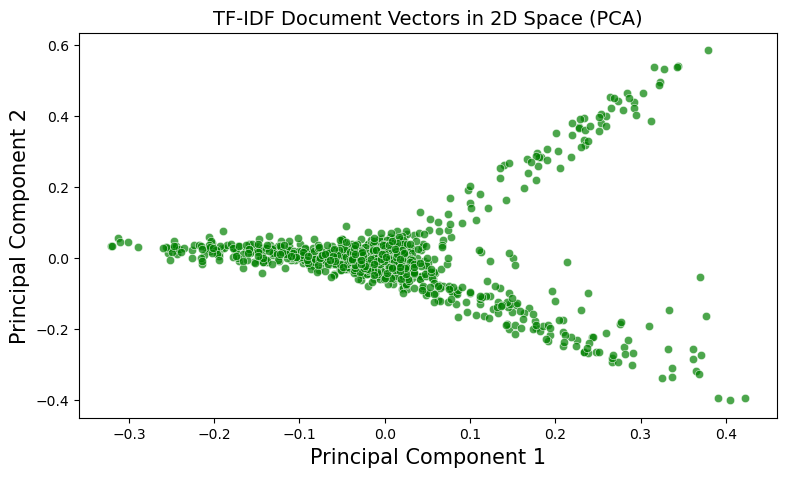

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_matrix.toarray())

# Convert the reduced vectors to a DataFrame for easier plotting
dataframe = pd.DataFrame(reduced_vectors, columns=['Principal Component 1', 'Principal Component 2'])

# Plot using Seaborn
plt.figure(figsize=(9, 5))
sns.scatterplot(data=dataframe, x='Principal Component 1', y='Principal Component 2', color='green', alpha=0.7)

# Add title and labels
plt.title("TF-IDF Document Vectors in 2D Space (PCA)", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=15)
plt.ylabel("Principal Component 2", fontsize=15)
plt.show()